# image2ascii: Convert Images to ASCII Art

By Akshaj Verma

## Libraries we will use today

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### `numpy`

In [2]:
a = np.array([1, 2, 3])
print(a.shape)
print(a)

(3,)
[1 2 3]


In [3]:
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b.shape)
print(b)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
c = np.array([[1, 2, 3]])
print(c.shape)
print(c)

(1, 3)
[[1 2 3]]


In [5]:
d = np.array([[1], [2], [3]])
print(d.shape)
print(d)

(3, 1)
[[1]
 [2]
 [3]]


In [6]:
e = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(e.shape)
print(e)

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
e[0], e[1], e[2]

(array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9]))

In [8]:
e[3]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [9]:
e[0][0], e[0][1], e[0][2]

(1, 2, 3)

In [10]:
e[0:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
e[0:2, 0:2]

array([[1, 2],
       [4, 5]])

In [12]:
e[:2, :2]

array([[1, 2],
       [4, 5]])

In [13]:
e.reshape(1, 9)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [14]:
e.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [15]:
f = np.array([[1, 2, 3]])
f.shape

(1, 3)

In [16]:
f.squeeze().shape

(3,)

### `matplotlib`

[-1.03092017  0.67227219 -0.68712748  0.5518934   0.45420853 -2.08508479
  0.9144308   1.57788867  0.54815104  0.20433645]
[-0.33981113 -0.16312996 -1.52714596  0.37386862 -0.61037322  0.09773529
  1.11010731  1.67123188 -1.37330537  0.90237788]


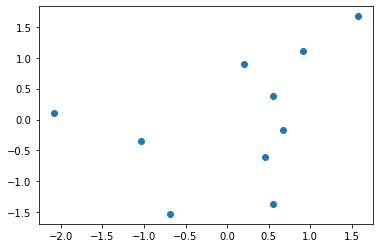

In [17]:
x = np.random.randn(10)
print(x)

y = np.random.randn(10)
print(y)

plt.scatter(x, y)

### `opencv`

In [238]:
image_arr = cv2.imread("./spaceship.png")

In [239]:
image_arr.shape

(757, 1346, 3)

In [240]:
cv2.imshow("image_arr", image_arr)

error: OpenCV(4.5.2) /tmp/pip-req-build-itd46xp8/opencv/modules/highgui/src/window.cpp:679: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


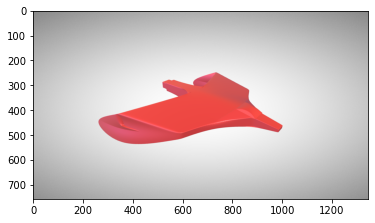

In [241]:
plt.imshow(image_arr)

In [242]:
image_arr = cv2.cvtColor(image_arr, cv2.`)

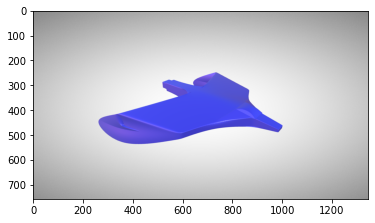

In [243]:
plt.imshow(image_arr)

## The Algorithm

### Convert Colour Image to Grayscale

In [244]:
grayscale_image = cv2.cvtColor(image_arr, cv2.COLOR_RGB2GRAY)
grayscale_image.shape

(757, 1346)

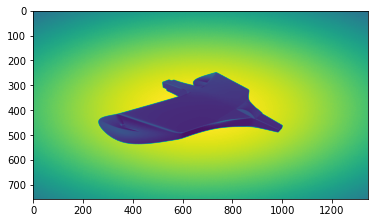

In [245]:
plt.imshow(grayscale_image)

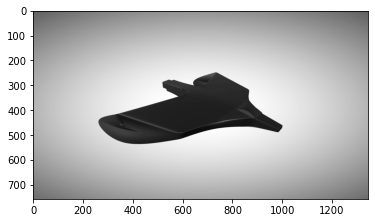

In [246]:
plt.imshow(grayscale_image, cmap="gray")

> [How do RGB to Grayscale conversion work in OpenCV?](https://docs.opencv.org/4.5.2/de/d25/imgproc_color_conversions.html)

## Resize Image

In [247]:
def resize_image(image_arr, new_width):
    current_height, current_width = image_arr.shape[0], image_arr.shape[1]
    new_height = int(new_width * (current_height/current_width))
    
    resized_img_arr = cv2.resize(image_arr, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    return resized_img_arr

In [248]:
image_arr.shape, image_arr.shape[0], image_arr.shape[1]

((757, 1346, 3), 757, 1346)

In [249]:
image_arr.shape[0]/image_arr.shape[1]

0.562407132243685

```
=> current_width/current_height = new_width/new_height
=> new_height = new_width * (current_height/current_width)
```

In [310]:
resized_image_arr = resize_image(image_arr=grayscale_image, new_width=70)

In [311]:
resized_image_arr.shape

(39, 70)

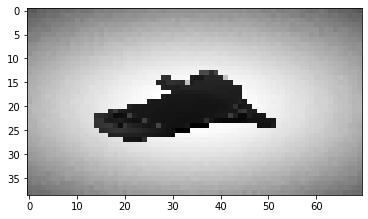

In [312]:
plt.imshow(resized_image_arr, cmap="gray")

## Convert to ASCII

In [313]:
ASCII = ["@", "&", "#", "$", "*", "+", "|", "^", "-", ";", ":", "\"", ",", "."]
# ASCII = ["@", "#", "*", "+", "^", "-", "\"", ",", "."]
len(ASCII), ASCII

(14, ['@', '&', '#', '$', '*', '+', '|', '^', '-', ';', ':', '"', ',', '.'])

In [314]:
resized_image_list = resized_image_arr.reshape(1, -1).squeeze().tolist()
# resized_image_list = resized_image_arr.reshape(1, -1).tolist()[0]

In [315]:
def pixel2ascii(px):
    ascii_char = ASCII[int(px/256 * len(ASCII))]
    return ascii_char

In [316]:
pixel2ascii(0), pixel2ascii(255), pixel2ascii(100) 

('@', '.', '+')

In [317]:
ascii_image_list = []

for px in resized_image_list:
    ascii_char = pixel2ascii(px)
    ascii_image_list.append(ascii_char)

## Print Image

In [318]:
resized_height = resized_image_arr.shape[0]
resized_width = resized_image_arr.shape[1]
resized_height, resized_width

(39, 70)

In [319]:
resized_height * resized_width, len(resized_image_list)

(2730, 2730)

In [320]:
for i in range(0, len(ascii_image_list), resized_width):
    print("".join(ascii_image_list[i: i + resized_width]))

^^^^------------;-;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;-------------^^^^^
^^-----------;;;;;;;;;;;;;;;;;;;;;;;:;;;;;;;;;;;;;;;;;;;;----------^^^
----------;;;;;;;;;;;;;;::;:::::::::::::::;:::::;;;;;;;;;;;-;---------
------;;;;;;;;;:;:;:::::::::::::::::::::::::::::::;::;;;;;;;;;;;------
-----;;;;;;;;::::::::::::::::::::""::::::::::::::::::::;;;;;;;;;;;;---
---;;;;;;;::::::::::::::"""""""""""""""""""":":::::::::::::;;;;;;;;;;-
-;;;;;;;::::::::::::""""""""""""""""""""""""""""""::::::::::::;;;;;;;;
;;;;;;::::::::::"""""""""""""""""""""""""""""""""""""::::::::::;;;;;;;
;;;;::::::::::""""""""""""",,",,,,,,,,,,,"""""""""""""""::::::::::;;;;
;;:::::::::"""""""""",",,,,,,,,,,,,,,,,,,,,,,,,"""""""""""":::::::::;;
:::::::::""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""":::::::::
:::::::""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""":::::::
:::::::"""""""",,,,,,,,,,,,,,,..........,,,,,,,,,,,,,,,,""""""""::::::
:::::"""""""",,,,,,,,,,,,...........||+|.....,,,,,,,,,,,,"""""""":::::
::::""